In [1]:
import torch
from transformers import DPTForDepthEstimation, DPTFeatureExtractor
import matplotlib.pyplot as plt
import cv2
import os

model_name = "Intel/dpt-large"
model_path = "intel_dpt_large"

# モデルの読み込み
if os.path.exists(model_path):
    model = DPTForDepthEstimation.from_pretrained(model_path)
    feature_extractor = DPTFeatureExtractor.from_pretrained(model_path)
else:
    feature_extractor = DPTFeatureExtractor.from_pretrained(model_name)
    model = DPTForDepthEstimation.from_pretrained(model_name)

    # モデルの保存
    model.save_pretrained(model_path)
    feature_extractor.save_pretrained(model_path)

c:\Users\data\miniconda3\envs\self_register\Lib\site-packages\transformers\models\dpt\feature_extraction_dpt.py:28: FutureWarning: The class DPTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DPTImageProcessor instead.
  warnings.warn(


In [4]:
# 画像をロードする、001から006までの画像がある
images = []
for filename in os.listdir(os.path.join('test', 'depth_test')):

    # 画像のPathを取得する
    full_path = os.path.join('test', 'depth_test', filename)

    if full_path.endswith(".jpg"):

        # 画像を読み込む
        image = cv2.imread(full_path)

        # Sizeを変更する
        image = cv2.resize(image, (480, 480))

        # 画像をリストに追加する
        images.append(image)

# Listで処理された画像を保存する
depths = []

# 画像を処理する
for i, image in enumerate(images):
    # OpenCVはBGRの画像を返すので、RGBに変換する
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 画像をテンソルに変換する
    inputs = feature_extractor(images=rgb_image, return_tensors="pt")

    # モデルを使って深度を推論する
    with torch.no_grad():
        outputs = model(**inputs)
        predicted_depth = outputs.predicted_depth

    # テンソルのbatch次元を削除する
    predicted_depth = predicted_depth.squeeze().cpu().numpy()

    # 画像を保存する
    depths.append(predicted_depth)

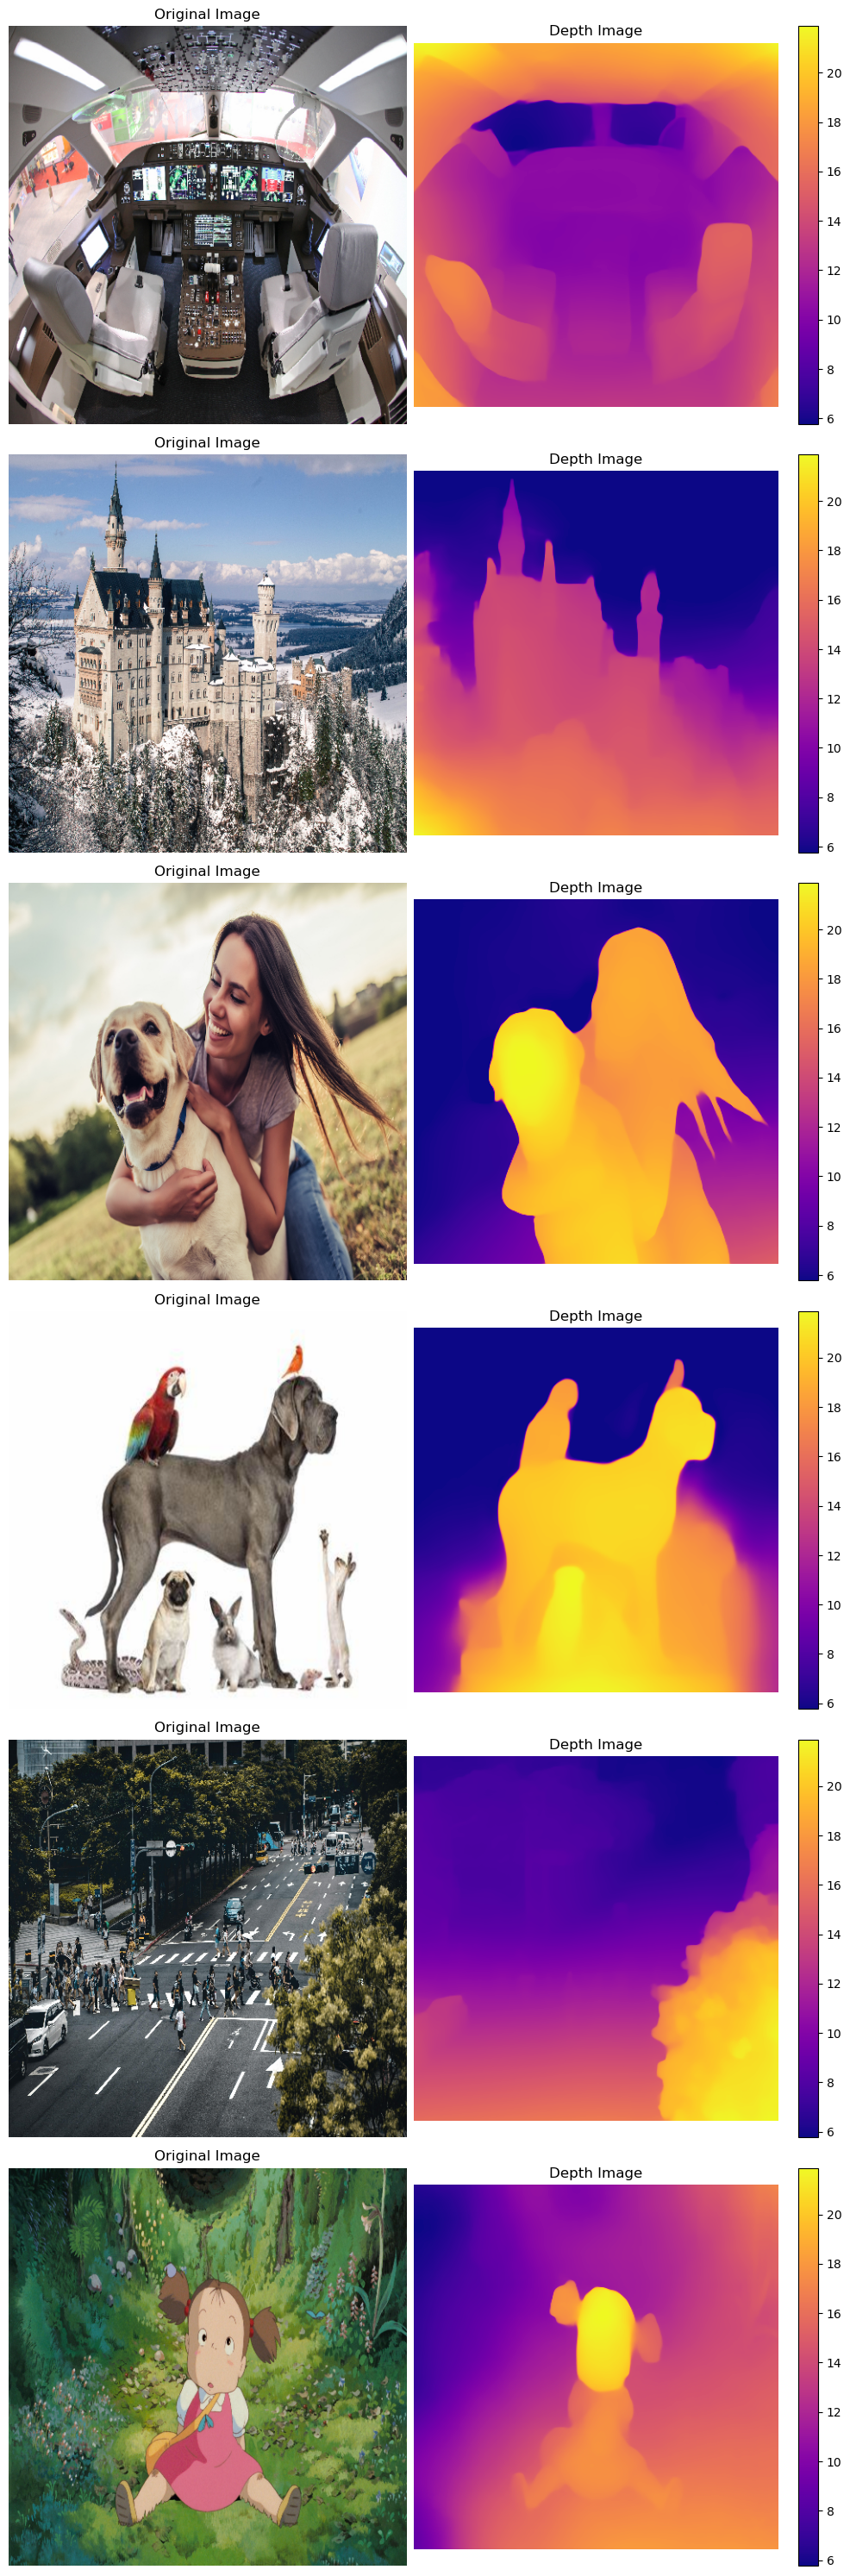

In [5]:
# プロットする画像の数を計算する
num_images = len(images)

# 2列で一左一右で画像を表示するための行数を計算する
num_cols = 2
num_rows = num_images

# Figureを作成する
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 5))

# 各画像とその深度画像をプロットする
for i in range(num_images):
    # 左側に原始画像を表示する
    axes[i, 0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Original Image')

    # 右側に深度画像を表示する
    im = axes[i, 1].imshow(depths[i], cmap="plasma")
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Depth Image')

# 各行の右側にカラーバーを追加する
for i in range(num_images):
    fig.colorbar(im, ax=axes[i, 1], orientation='vertical', fraction=0.05, pad=0.05)

# グラフを表示する
plt.tight_layout()
plt.show()